<a href="https://colab.research.google.com/github/bjentwistle/PythonFundamentals/blob/main/Projects/Final_Air_quality_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project looking into the Air Quality of Kent Roads in England 2020 & 2021 data.

### Project aims:  to clean and wrangle air quality data and provide visualisations to show trends in road use and Nitrogen Oxide levels recorded.

The following data file contains data collected at a roadside monitoring station.  You can see the data for year 2020 in a spreadsheet here: https://docs.google.com/spreadsheets/d/1XpAvrpuyMsKDO76EZ3kxuddBOu7cZX1Od4uEts14zco/edit?usp=sharing

The data contains:
* a heading line (Chatham Roadside)
* dates and times of readings 
* Nitrogen Dioxide levels (sometimes contain nodata)
* Status which is always the same (V µg/m³) the units of measure.





## Why do we record Nitrogen Oxide (NO2) levels?

"Environmental and health effects of nitrogen oxides

Elevated levels of nitrogen dioxide can cause damage to the human respiratory tract and increase a person's vulnerability to, and the severity of, respiratory infections and asthma.

Long-term exposure to high levels of nitrogen dioxide can cause chronic lung disease.

It may also affect the senses, for example, by reducing a person's ability to smell an odour.

High levels of nitrogen dioxide are also harmful to vegetation—damaging foliage, decreasing growth or reducing crop yields." [Environmental and health effects of nitrogen oxides](https://www.qld.gov.au/environment/pollution/monitoring/air/air-pollution/pollutants/nitrogen-oxides)

"The Air Quality Standards Regulations 2010 require that the annual mean concentration of NO2 must not exceed **40 µg/m3** and that there should be no more than 18 exceedances of the hourly mean limit value (concentrations **above 200 µg/m3**) in a single year." (Sourced from National statistics
Concentrations of nitrogen dioxide  [National statistics
Concentrations of nitrogen dioxide ](https://www.gov.uk/government/statistics/air-quality-statistics/ntrogen-dioxide))


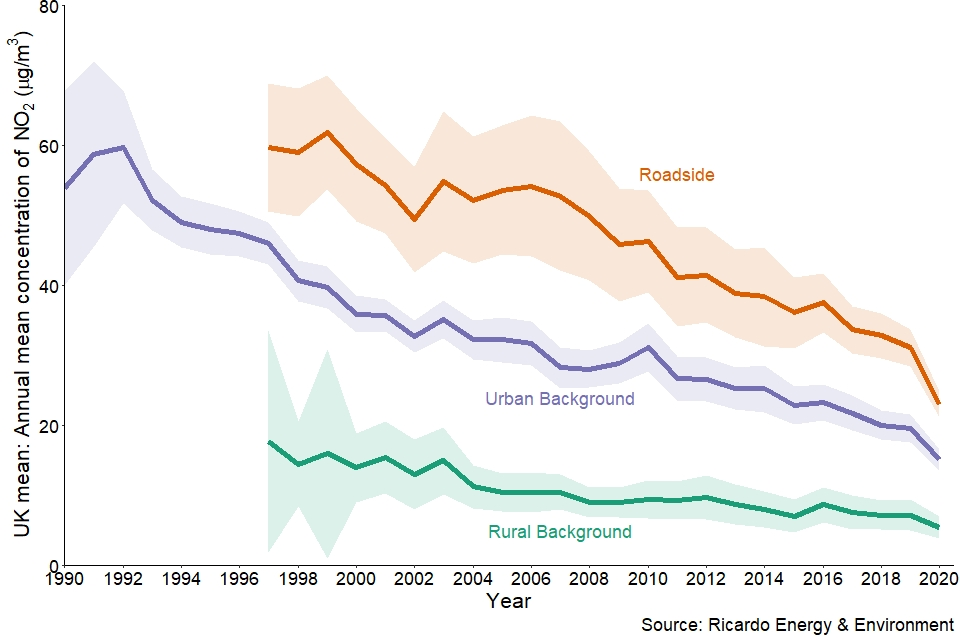

As you can see the levels of Nitrogen Oxide (NO2) have decreased rapidly over the past decade since the regulations were put in place. However, with the increased number of vehicles on our roads casuing worsening traffic jams the levels of NO2 could creep up to dangerous levels for urban areas. Hence, affecting the health of residents and workers on those streets.

### Tasks to clean, sort and wrangle the data

1. Read the dataset into a dataframe, skipping the first row   
2. Convert dates to date format.  
3. Remove rows with nodata in the Nitrogen dioxide column.  
4. Convert the Nitrogen dioxide levels values to float type  
5. Sort by Nitrogen dioxide level.  
6. Create a new column for 'Weekdays'.  
7. Rename the column Nitrogen dioxide level to NO2 Level (V ug/m3)  
8. Remove the Status column.  


In [1]:
import pandas as pd

#read in data for 2021 air quality of Chatham Roadside
url = "https://raw.githubusercontent.com/bjentwistle/PythonFundamentals/main/Datasets/NO2-measured-data-2020-2021-Chatham-Roadside%20-%20NO2-measurement-data-2020-2021-test2.csv"
air_quality_2020 = pd.read_csv(url,skiprows=[0], encoding = 'unicode_escape') 
#Kept getting error message about unicodedecodeerror-utf8 so Stack Overflow advice was to add encoding parameter to read.csv.

#remove 'nodata' rows from Nitrogen Dioxide column
for i in air_quality_2020.index:
  if air_quality_2020.loc[i, "Nitrogen dioxide"] == "nodata":
    air_quality_2020.drop(i, inplace = True) 

air_quality_2020.dtypes #check the data types in the dataframe

Date                object
Time                object
Nitrogen dioxide    object
Status              object
dtype: object

In [2]:
air_quality_2020.head() #show the top 5 rows of the dataframe to check the columns look as you expect.

,Date,Time,Nitrogen dioxide,Status
0,01/01/2020,01:00:00,41.07113,V µg/m³
1,01/01/2020,02:00:00,38.9604,V µg/m³
2,01/01/2020,03:00:00,35.12313,V µg/m³
3,01/01/2020,04:00:00,35.85312,V µg/m³
4,01/01/2020,05:00:00,32.10503,V µg/m³


In [3]:
#To convert all dates to Datetime format
air_quality_2020['Date'] = pd.to_datetime(air_quality_2020['Date'])
#To convert "Time" column to actual time format
air_quality_2020['Time'] = pd.to_datetime(air_quality_2020['Time'],format= '%H:%M:%S' ).dt.time

#To convert Nitrogen dioxide column to float type
air_quality_2020['Nitrogen dioxide'] = pd.Float64Index(air_quality_2020['Nitrogen dioxide'])

#To sort by Nitrogen dioxide
air_quality_2020 = air_quality_2020.sort_values("Nitrogen dioxide")

#To add new column called 'weekdays'
air_quality_2020["Weekdays_num"] = air_quality_2020['Date'].dt.weekday #will need this later for pivot table indexing
air_quality_2020["Weekdays"] = air_quality_2020['Date'].dt.strftime("%a")

#To rename Nitrogen dioxide column to "NO2 Level (V ug/m3)"
air_quality_2020.rename(columns = {"Nitrogen dioxide":"NO2 Level (V ug/m3)"}, inplace =True)

#To drop the Status column
air_quality_2020_v2 = air_quality_2020.drop(["Status"],axis=1)

### Expand the dataset and show summary statistics for larger dataset
---

There is a second data set here covering the year 2021:  https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ  


In [4]:
#Repeat for the next year of data 2021-2022
#To read in data for 2021 air quality of Chatham Roadside
url =  "https://raw.githubusercontent.com/bjentwistle/PythonFundamentals/main/Datasets/NO2-measured-data-2021-2022-Chatham-Roadside%20test1.csv"
air_quality_2021 = pd.read_csv(url, skiprows=[0])

#To remove 'nodata' rows from Nitrogen Dioxide column
for x in air_quality_2021.index:
  if air_quality_2021.loc[x, "Nitrogen dioxide"] == "nodata":
    air_quality_2021.drop(x, inplace = True) 

#Do the same with 2021 dataset - convert all dates to Datetime format
air_quality_2021['Date'] = pd.to_datetime(air_quality_2021['Date'])
air_quality_2021['Time'] = pd.to_datetime(air_quality_2021['Time'],format= '%H:%M:%S' ).dt.time

#To convert Nitrogen dioxide column to float type
air_quality_2021['Nitrogen dioxide'] = pd.Float64Index(air_quality_2021['Nitrogen dioxide'])

#To sort by Nitrogen dioxide
air_quality_2021 = air_quality_2021.sort_values("Nitrogen dioxide")

#To add new column called 'weekdays'
air_quality_2021["Weekdays_num"] = air_quality_2021['Date'].dt.weekday
air_quality_2021["Weekdays"] = air_quality_2021['Date'].dt.strftime("%a")

#To rename Nitrogen dioxide column to "NO2 Level (V ug/m3)"
air_quality_2021.rename(columns = {"Nitrogen dioxide":"NO2 Level (V ug/m3)"}, inplace =True)

#To drop the Status column
air_quality_2021_v2 = air_quality_2021.drop(["Status"],axis=1)

air_quality_2021_v2.head()


,Date,Time,NO2 Level (V ug/m3),Weekdays_num,Weekdays
7177,2021-10-27,02:00:00,-0.77743,2,Wed
7009,2021-10-20,02:00:00,-0.54076,2,Wed
7107,2021-10-24,04:00:00,-0.41740,6,Sun
6674,2021-06-10,03:00:00,-0.31174,3,Thu
7178,2021-10-27,03:00:00,-0.28544,2,Wed


Concatenate the two datasets to expand it to 2020 and 2021.  

In [5]:
import numpy as np

#concatenate the two years of data and sort by date then print as a test
combined_df = pd.concat([air_quality_2020_v2, air_quality_2021_v2], join='inner', ignore_index=True)
combined_df = combined_df.sort_values("Date")

#Calcuate the averages NO2 levels by weekdays (same as pivot below)
# average_NO2 = combined_df.groupby(["Weekdays"])["NO2 Level (V ug/m3)"].mean()
# print(average_NO2)

combined_df.describe()

,NO2 Level (V ug/m3),Weekdays_num
count,17312.000000,17312.000000
mean,18.590636,3.007336
std,12.793750,1.999452
min,-0.777430,0.000000
25%,9.020180,1.000000
50%,15.433880,3.000000
75%,24.919745,5.000000
max,113.061890,6.000000


## Explanation
--------------
The combind dataframe contains 17,312 rows of data after the null values were removed. The maximum NO2 level is 113.06 V ug/m3.

In [6]:
#Group by Weekdays and show mean NO2 levels by day of the week (Start of the week is Monday)
air_quality_pivot = pd.pivot_table(combined_df, values = "NO2 Level (V ug/m3)", index = ["Weekdays_num"], aggfunc = np.mean)

print(air_quality_pivot)

              NO2 Level (V ug/m3)
Weekdays_num                     
0                       18.646198
1                       19.386772
2                       20.612752
3                       19.572436
4                       19.447164
5                       17.217820
6                       15.259131


### Further work
Returning to this project after several weeks on the Data Accelerator course, I wanted to add some visualisations and possible predictions to this project.

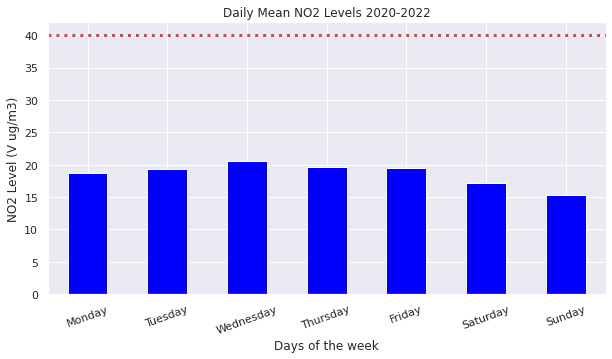

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plot the daily mean levels of NO2 using the pivot table above.
sns.set(rc = {'figure.figsize':(10,5)})

air_quality_pivot.plot(kind='bar', color = "blue", legend = False)

plt.xticks([0, 1, 2,3,4,5,6], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],rotation=20)
plt.ylabel("NO2 Level (V ug/m3)")
plt.xlabel("Days of the week")
plt.title("Daily Mean NO2 Levels 2020-2022")

# Plot a horizontal line using axhline() in pyplot - shows the maximum allowed level by the government regualtions.
plt.axhline(y=40, xmin=0, xmax=1, color='r', linestyle=':', linewidth=3, label = "Regualtion max")
plt.show()

# Findings
This plot of NO2 levels plotted by the day they were recorded shows very clearly that Sunday is when there are the least number of vehicles on the road. Conversely, the busiest days of the week have the highest levels of NO2.

It would be interesting to see what the levels are like at different times of the day too.


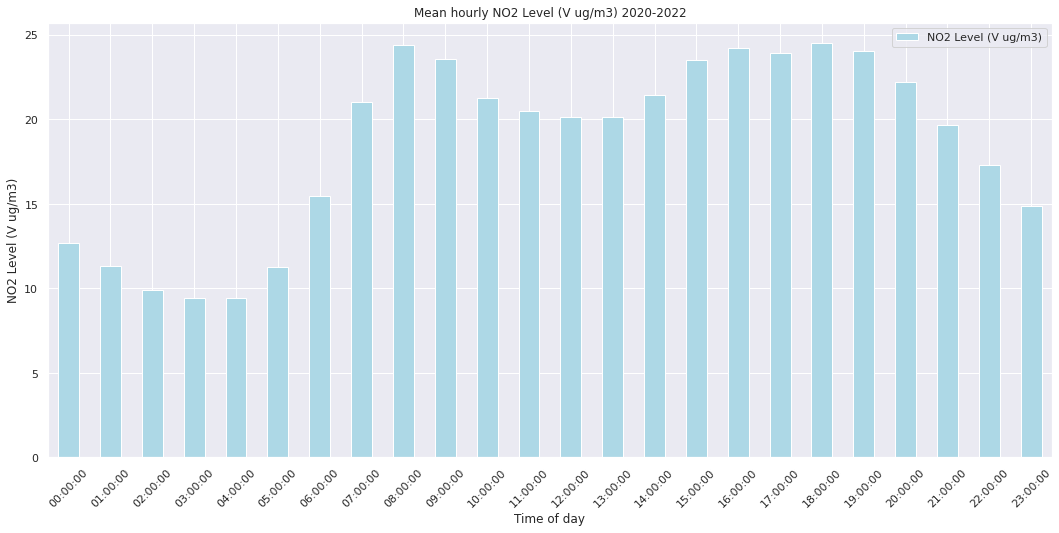

In [8]:
#Group by time and show summary stats by day of the week
air_quality__time_pivot = pd.pivot_table(combined_df, values = "NO2 Level (V ug/m3)", index = ["Time"], aggfunc = np.mean)
#print(air_quality__time_pivot)
sns.set(rc = {'figure.figsize':(18,8)})
air_quality__time_pivot.plot(kind='bar', color = "lightblue").legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.title("Mean hourly NO2 Level (V ug/m3) 2020-2022")
plt.ylabel("NO2 Level (V ug/m3)")
plt.xlabel("Time of day")
plt.show()

# Findings
This plot shows the peak times during the day when the highest levels (above 20 ug/m3) coincide with 'rush hour' times. These times are 7am till 10am then between 2pm and 8pm. 


1.   This plot shows the peak times during the day when the highest levels coincide with 'rush hour' times.
2.   The lowest levels (volume under 10 ug/m3)  are the hours of 2am till 4am. These are generally the quiestest times on the roads. However, the levels never get near to zero in those quiet hours suggesting that the NO2 lingers in the air constantly.



## Making predictions:
As more restrictions on the types of vehicles that can be made (ie the end of diesel and petrol engines from 2030), the adding of congestion zones in towns and cities and the increase of electric cars driving our streets, I predict that the emmisions recorded by street monitoring stations will continue to decrease.

### Helpful references
---
Source of the data used here from [Reporting Air Quality in Kent and Medway](https://kentair.org.uk/).

[Ban on petrol and diesel cars in 2030
](https://www.gov.uk/government/news/government-takes-historic-step-towards-net-zero-with-end-of-sale-of-new-petrol-and-diesel-cars-by-2030)

[Low Emission Zones to be introduced in Edinburgh 31st May 2022](https://www.edinburgh.gov.uk/roads-travel-parking/low-emission-zone-scheme/4)


